In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
player = pd.read_excel("C:/Users/Jitesh Asodekar/Documents/IPL_Data.xlsx", sheet_name="Player")
player.head()

,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire
0,1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,0
1,2,BB McCullum,1981-09-27,Right_Hand,Right-arm medium,New Zealand,0
2,3,RT Ponting,1974-12-19,Right_Hand,Right-arm medium,Australia,0
3,4,DJ Hussey,1977-07-15,Right_Hand,Right-arm offbreak,Australia,0
4,5,Mohammad Hafeez,1980-10-17,Right_Hand,Right-arm offbreak,Pakistan,0


In [3]:
Match = pd.read_excel("C:/Users/Jitesh Asodekar/Documents/IPL_Data.xlsx", sheet_name="Match")
Match.head()

,Match_Date,Match ID,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,...,Win_Type,Won_By,Match_Winner_Id,Match_Winner_name,Man_Of_The_Match_Id,Man_of_the_match_name,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,2008-04-18,335987,2,1,1,M Chinnaswamy Stadium,2,field,0,1,...,by runs,140.0,1.0,KKR,2.0,BB McCullum,470,477,Bangalore,India
1,2008-04-19,335988,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,...,by runs,33.0,3.0,CSK,19.0,MEK Hussey,471,487,Chandigarh,India
2,2008-04-19,335988,6,5,1,Feroz Shah Kotla,5,bat,0,1,...,by wickets,9.0,6.0,DD,90.0,MF Maharoof,472,512,Delhi,India
3,2008-04-20,335990,7,2,1,Wankhede Stadium,7,bat,0,1,...,by wickets,5.0,2.0,RCB,11.0,MV Boucher,473,476,Mumbai,India
4,2008-04-20,335990,1,8,1,Eden Gardens,8,bat,0,1,...,by wickets,5.0,1.0,KKR,4.0,DJ Hussey,474,486,Kolkata,India


In [4]:
Player_match = pd.read_excel("C:/Users/Jitesh Asodekar/Documents/IPL_Data.xlsx", sheet_name="Player_match")
Player_match.head()

,Match_Id,Player_Id,Team_Id,Is_Keeper,Is_Captain,Player_name
0,335987,1,1,0,1,SC Ganguly
1,335987,2,1,0,0,BB McCullum
2,335987,3,1,0,0,RT Ponting
3,335987,4,1,0,0,DJ Hussey
4,335987,5,1,0,0,Mohammad Hafeez


In [5]:
Match.columns

Index(['Match_Date', 'Match ID', 'Team_Name_Id', 'Opponent_Team_Id',
       'Season_Id', 'Venue_Name', 'Toss_Winner_Id', 'Toss_Decision',
       'IS_Superover', 'IS_Result', 'Is_DuckWorthLewis', 'Win_Type', 'Won_By',
       'Match_Winner_Id', 'Match_Winner_name', 'Man_Of_The_Match_Id',
       'Man_of_the_match_name', 'First_Umpire_Id', 'Second_Umpire_Id',
       'City_Name', 'Host_Country'],
      dtype='object')

In [6]:
# 18 colms and 577 rows
Match.shape

(577, 21)

In [7]:
#unique values in colm. Venue_Name
Match.Venue_Name.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Buffalo Park',
       'Brabourne Stadium', 'Kingsmead', 'SuperSport Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Sardar Patel Stadium, Motera',
       'Barabati Stadium', 'Vidarbha Cricket Association Stadium, Jamtha',
       'Subrata Roy Sahara Stadium',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
  

# 1) It gives no of matches played in particular stadium.

In [8]:
Match["Venue_Name"].value_counts()

M Chinnaswamy Stadium                                   58
Eden Gardens                                            54
Feroz Shah Kotla                                        53
Wankhede Stadium                                        49
MA Chidambaram Stadium, Chepauk                         48
Rajiv Gandhi International Stadium, Uppal               41
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       11
Himachal Pradesh Cricket Association Stadium             9
New Wanderers Stadium                                   

# 2) when toss is won most of the team has choosen to field first rather than batting.

In [9]:
TD = Match["Toss_Decision"].value_counts()
TD

field    315
bat      262
Name: Toss_Decision, dtype: int64

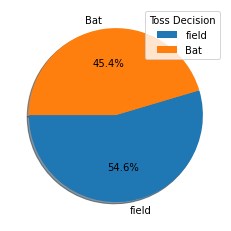

In [10]:
plt.pie(TD,data = TD, labels= ["field","Bat"],autopct = "%2.1f%%",shadow = True, startangle = 180)
plt.legend(title = "Toss Decision")
plt.show()

# 3) Throughout the seasons most of them team has won by wickets 

In [11]:
WT = Match["Win_Type"].value_counts()
WT

by wickets    307
by runs       261
Tie             6
No Result       3
Name: Win_Type, dtype: int64

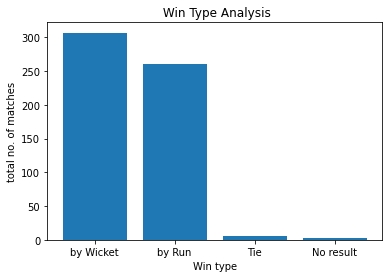

In [12]:
a= ["by Wicket","by Run","Tie", "No result"]
plt.bar(a, WT)
plt.title(" Win Type Analysis")
plt.xlabel("Win type")
plt.ylabel("total no. of matches")
plt.show()

# 4) Batting_Hand_Count

In [13]:
player.set_index("Player_Id",inplace=True)
player.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire
Player_Id,,,,,,
1,SC Ganguly,1972-07-08,Left_Hand,Right-arm medium,India,0
2,BB McCullum,1981-09-27,Right_Hand,Right-arm medium,New Zealand,0
3,RT Ponting,1974-12-19,Right_Hand,Right-arm medium,Australia,0
4,DJ Hussey,1977-07-15,Right_Hand,Right-arm offbreak,Australia,0
5,Mohammad Hafeez,1980-10-17,Right_Hand,Right-arm offbreak,Pakistan,0


In [14]:
Batting_hand = player.groupby(['Batting_Hand']).count()
Batting_hand

,Player_Name,DOB,Bowling_Skill,Country,Is_Umpire
Batting_Hand,,,,,
Left_Hand,126,126,113,126,126
Right_Hand,345,345,314,345,345


In [15]:
Batting_hand.drop(['DOB','Bowling_Skill','Country','Is_Umpire'],axis=1,inplace=True)
Batting_hand

,Player_Name
Batting_Hand,
Left_Hand,126
Right_Hand,345


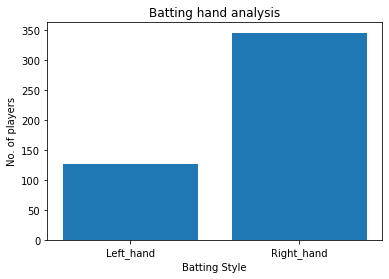

In [16]:
bh = ["Left_hand","Right_hand"]
bt = [126,345]
plt.bar(bh,bt)
plt.title("Batting hand analysis")
plt.xlabel("Batting Style")
plt.ylabel("No. of players")
plt.show()

In [17]:
Match_winner = Match.groupby("Match_Winner_name").count()
Match_winner

,Match_Date,Match ID,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,Man_of_the_match_name,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
Match_Winner_name,,,,,,,,,,,,,,,,,,,,
CSK,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79
DC,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
DD,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56
GL,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
KKR,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68
KTK,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
KXIP,63,63,63,63,63,63,63,63,63,63,63,63,61,63,63,63,63,63,63,63
MI,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
PW,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


# 5) Top 5 Man of the match palyers

In [18]:
Man_of_match = Match['Man_of_the_match_name'].value_counts()[0:5]
pd.DataFrame(Man_of_match)

,Man_of_the_match_name
CH Gayle,17
YK Pathan,16
AB de Villiers,15
DA Warner,14
SK Raina,13


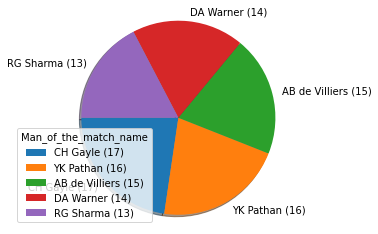

In [19]:
player_name = ['CH Gayle (17)','YK Pathan (16)','AB de Villiers (15)','DA Warner (14)','RG Sharma (13)']
total_man_of_match = [17,16,15,14,13]
plt.pie(total_man_of_match,labels = player_name, shadow = True, startangle =180)
plt.axis('equal')
plt.legend(title = "Man_of_the_match_name")
plt.show()

# 6) No. of time Dhoni was a keeper

In [20]:
dhoni = Player_match[(Player_match.Player_Id ==20) & (Player_match.Is_Keeper == 1)]
dhoni.head()

,Match_Id,Player_Id,Team_Id,Is_Keeper,Is_Captain,Player_name
25,335988,20,3,1,1,MS Dhoni
158,335994,20,3,1,1,MS Dhoni
255,335998,20,3,1,1,MS Dhoni
312,336001,20,3,1,1,MS Dhoni
421,336006,20,3,1,1,MS Dhoni


In [21]:
dhoni.value_counts()

Match_Id  Player_Id  Team_Id  Is_Keeper  Is_Captain  Player_name
335988    20         3        1          1           MS Dhoni       1
729316    20         3        1          1           MS Dhoni       1
598075    20         3        1          1           MS Dhoni       1
598078    20         3        1          1           MS Dhoni       1
729288    20         3        1          1           MS Dhoni       1
                                                                   ..
501216    20         3        1          1           MS Dhoni       1
501211    20         3        1          1           MS Dhoni       1
501203    20         3        1          1           MS Dhoni       1
419170    20         3        1          1           MS Dhoni       1
981010    20         12       1          1           MS Dhoni       1
Length: 136, dtype: int64

In [22]:
dhoni.drop(["Match_Id", "Player_Id","Team_Id","Player_name"], axis = 1, inplace = True)

C:\Users\Jitesh Asodekar\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
dhoni.count()

Is_Keeper     136
Is_Captain    136
dtype: int64

# 7) Which team has won toss as well as match?

In [24]:
toss = Match[["Match_Winner_name","Toss_Winner_Id","Match_Winner_Id"]][Match.Toss_Winner_Id == Match.Match_Winner_Id]
toss.head()

,Match_Winner_name,Toss_Winner_Id,Match_Winner_Id
1,CSK,3,3.0
8,RR,5,5.0
10,RR,5,5.0
12,DC,8,8.0
14,CSK,3,3.0


In [25]:
toss.groupby(["Match_Winner_name","Toss_Winner_Id","Match_Winner_Id"]).size().sort_values(ascending=False)

Match_Winner_name  Toss_Winner_Id  Match_Winner_Id
CSK                3               3.0                42
MI                 7               7.0                41
KKR                1               1.0                38
RR                 5               5.0                34
RCB                2               2.0                33
DD                 6               6.0                28
KXIP               4               4.0                26
DC                 8               8.0                19
SRH                11              11.0               14
GL                 13              13.0                6
KTK                9               9.0                 4
PW                 10              10.0                3
RPS                12              12.0                3
dtype: int64

# 8) Team which has won ipl maximum no. of time.

In [26]:
wins = Match.groupby(["Match_Winner_name"])["Match_Winner_Id"].count().sort_values(ascending = False)
wins

Match_Winner_name
MI      80
CSK     79
RCB     70
KKR     68
KXIP    63
RR      63
DD      56
SRH     34
DC      29
PW      12
GL       9
KTK      6
RPS      5
Name: Match_Winner_Id, dtype: int64

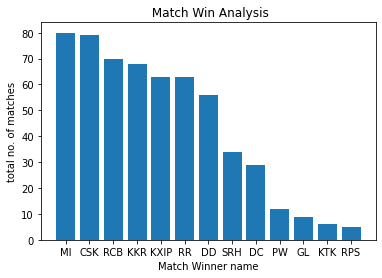

In [27]:
Team_name = ["MI","CSK","RCB","KKR","KXIP","RR","DD","SRH","DC","PW","GL","KTK","RPS"]
plt.bar(Team_name, wins)
plt.title(" Match Win Analysis")
plt.xlabel("Match Winner name")
plt.ylabel("total no. of matches")
plt.show()